In [1]:
from GSMMutils.experimental.ExpMatrix import ExpMatrix
from GSMMutils.experimental.Biomass import Biomass
from GSMMutils.stats.stats import StatisticalAnalysis
from GSMMutils import DATA_PATH
import pandas as pd
from GSMMutils.graphics.plot import boxplot, hist, qqplot

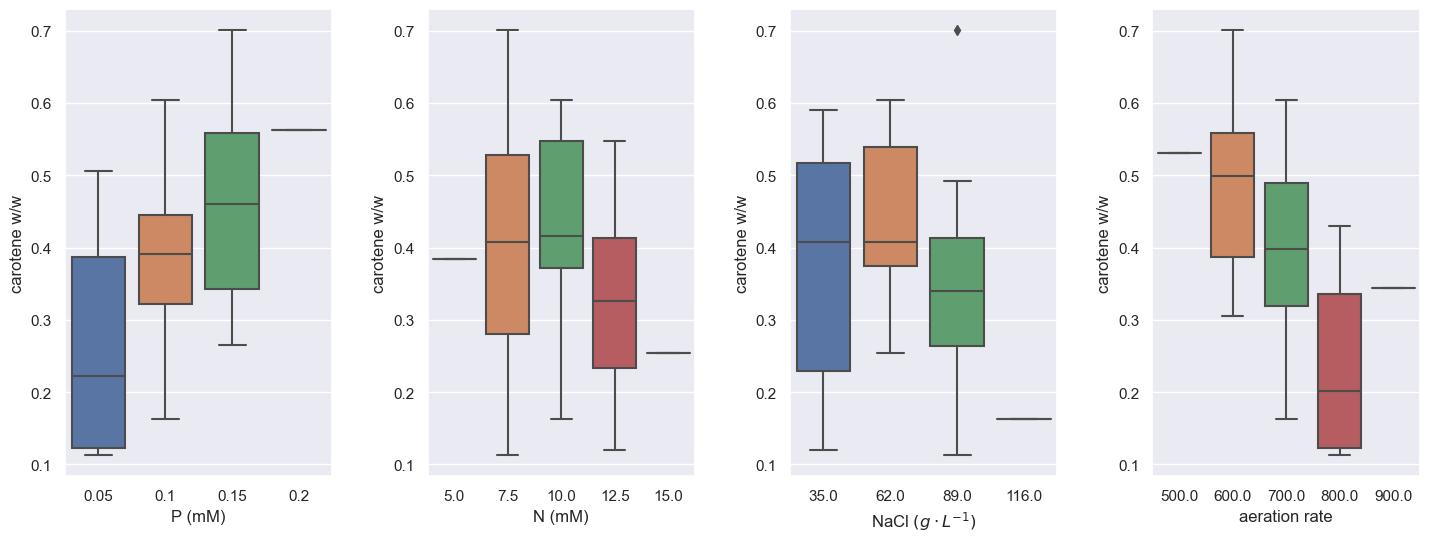

In [2]:
biomass = Biomass("e_Biomass__cytop", f"{DATA_PATH}/experimental/Biomass_exp_composition.xlsx")
matrix = ExpMatrix(f"{DATA_PATH}/experimental/Matriz- DCCR Dunaliella salina_dfba.xlsx")
matrix.conditions = "Resume"
matrix.conditions = matrix.conditions.rename({"[N] mmol": "N", "[P] mmol": "P", "Salinity g/L": "salinity", "Aeration rate": "aeration", 'growth_rate': 'umax', 'Productivity (g/L.h)': 'Pmax', 'Biomass (gDW/L)': 'biomass'}, axis=1)
m = pd.concat([biomass.biomass_matrix['macromolecules'], matrix.conditions[["N", "P", "salinity", "aeration"]]], axis=1)
m = m.dropna()

m = pd.concat([biomass.biomass_matrix['pigments'].filter(regex='.*mean.*',axis=1), matrix.conditions[["N", "P", "salinity", "aeration"]]], axis=1)
m = m.dropna()
m.rename(columns = {"B-carotene (mean)": 'carotene', "Lutein (mean)": 'lutein', "Chlorophyll a (mean)": 'chla', "Chlorophyll b (mean)": 'chlb'}, inplace=True)

boxplot(m, x_cols=['P', 'N', 'salinity', 'aeration'], y_cols=['carotene'], to_show=True, x_labels={'P': 'P (mM)', 'N': 'N (mM)', 'salinity': 'NaCl $(g \cdot L^{-1})$', 'aeration': 'aeration rate'}
        , y_labels={'carotene': 'carotene w/w'})

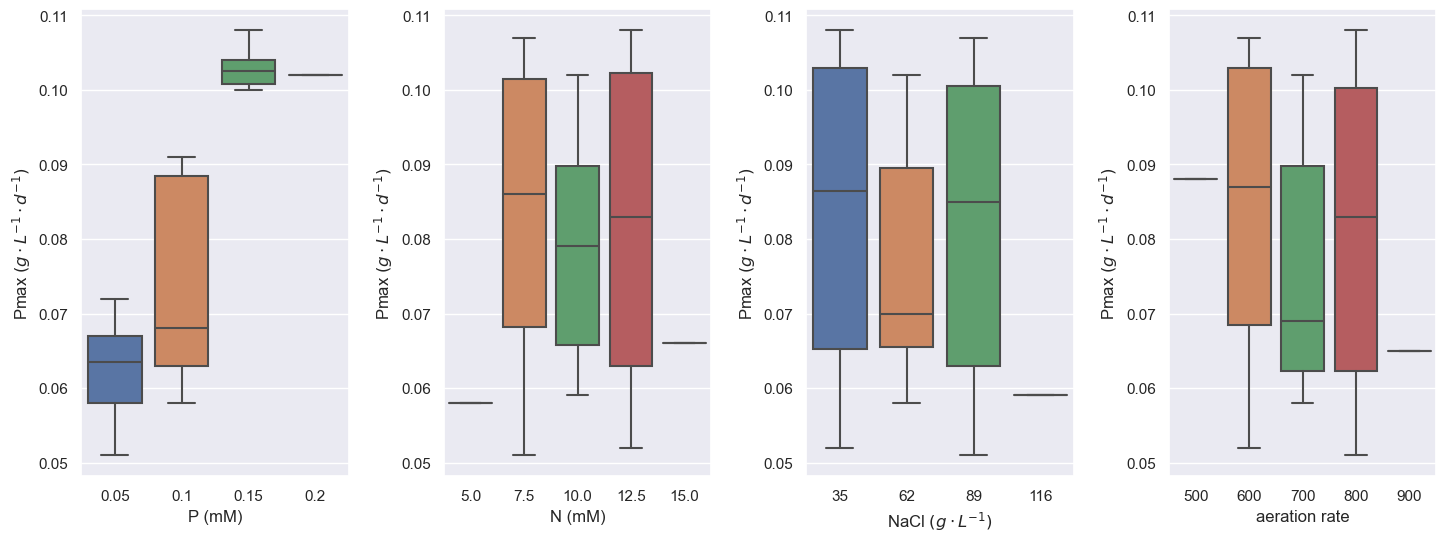

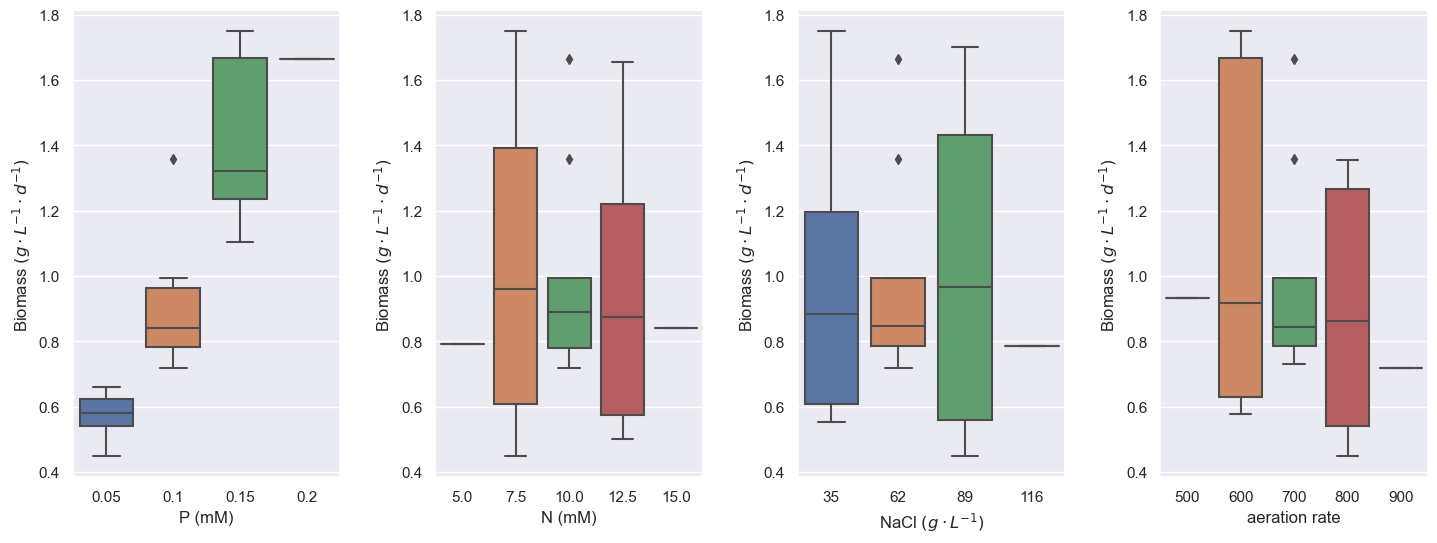

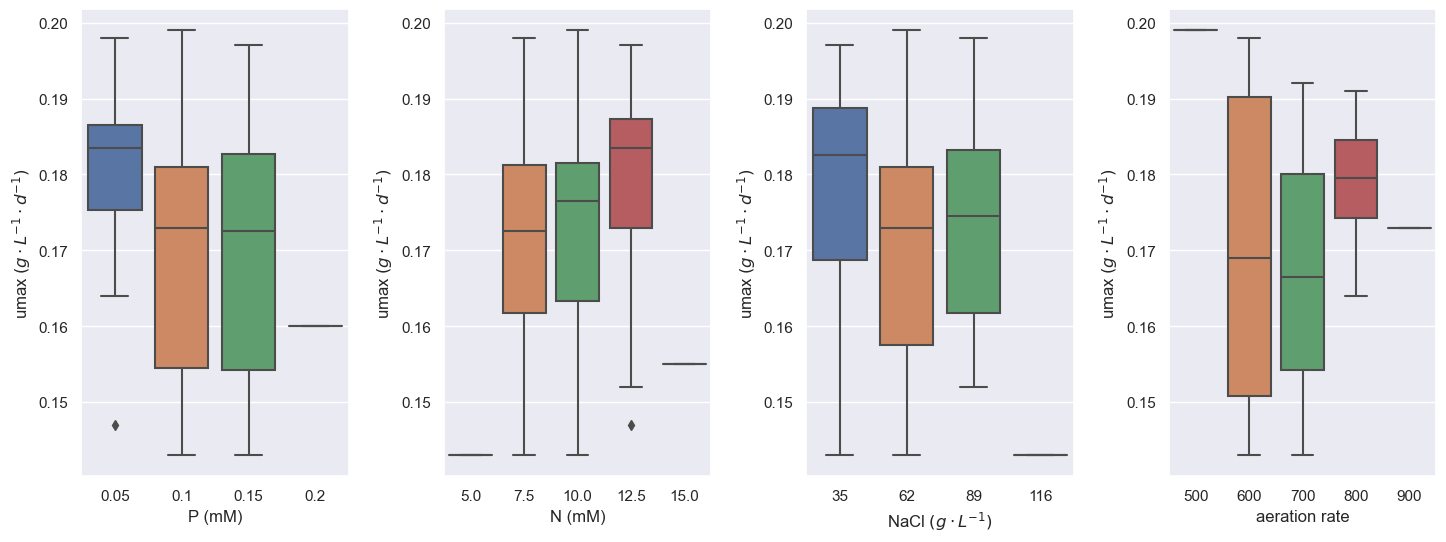

                  biomass ~ P                  
             sum_sq    df          F        PR(>F)
P         3.285165   1.0  94.940683  3.629901e-10
Residual  0.899659  26.0        NaN           NaN 
 ##################################################
            sum_sq    df          F        PR(>F)
P         3.285165   1.0  94.940683  3.629901e-10
Residual  0.899659  26.0        NaN           NaN


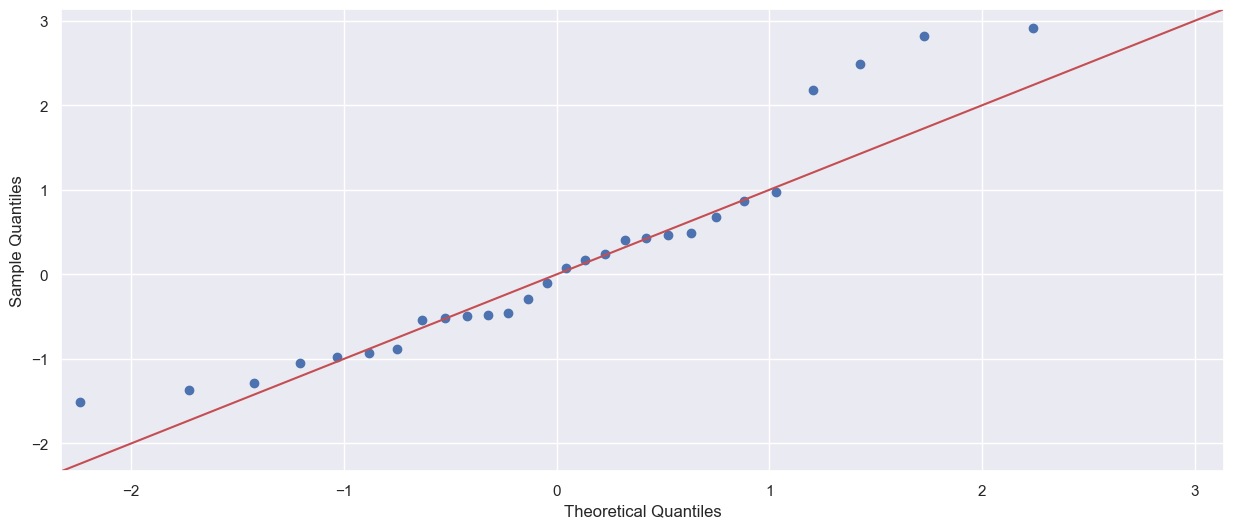

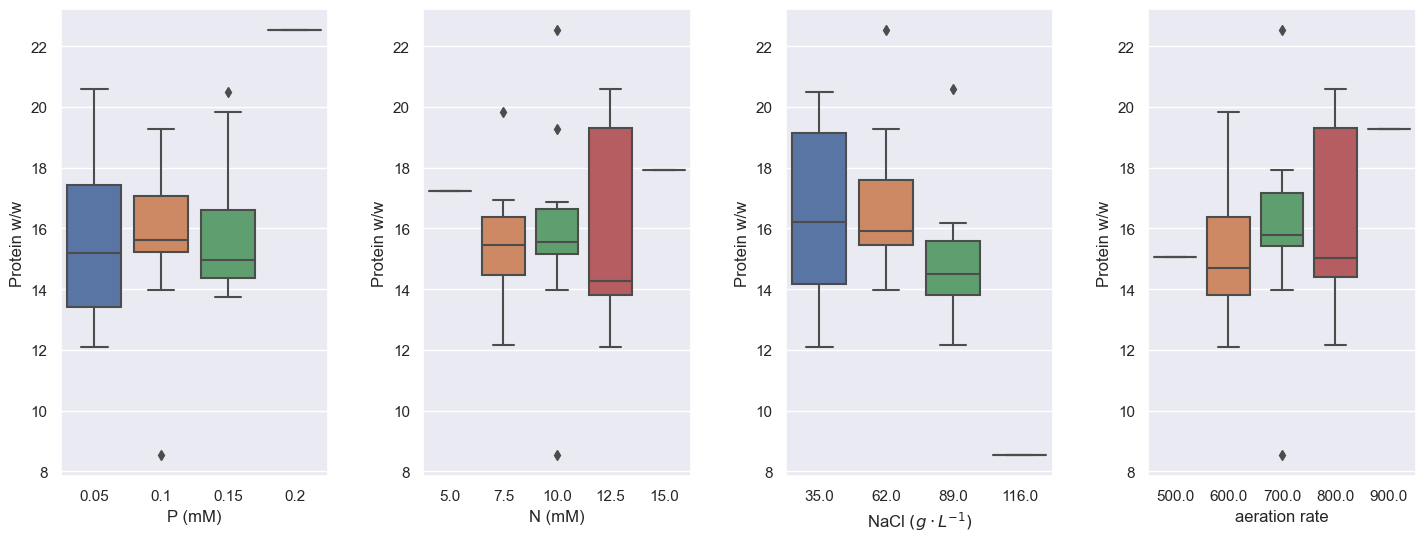

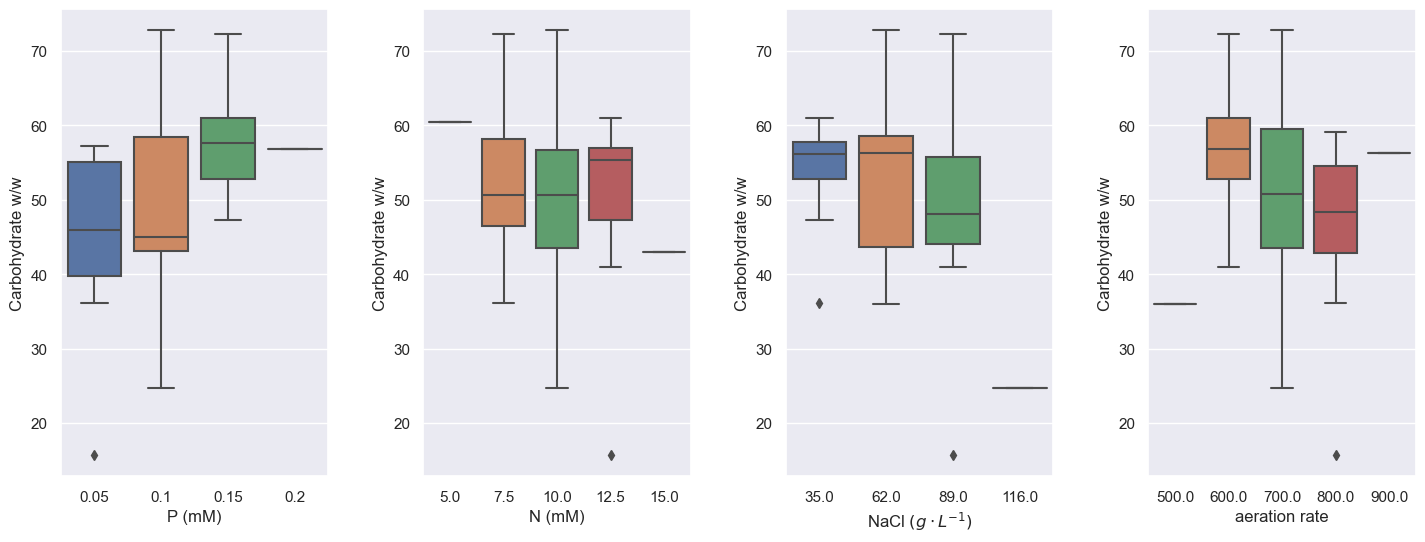

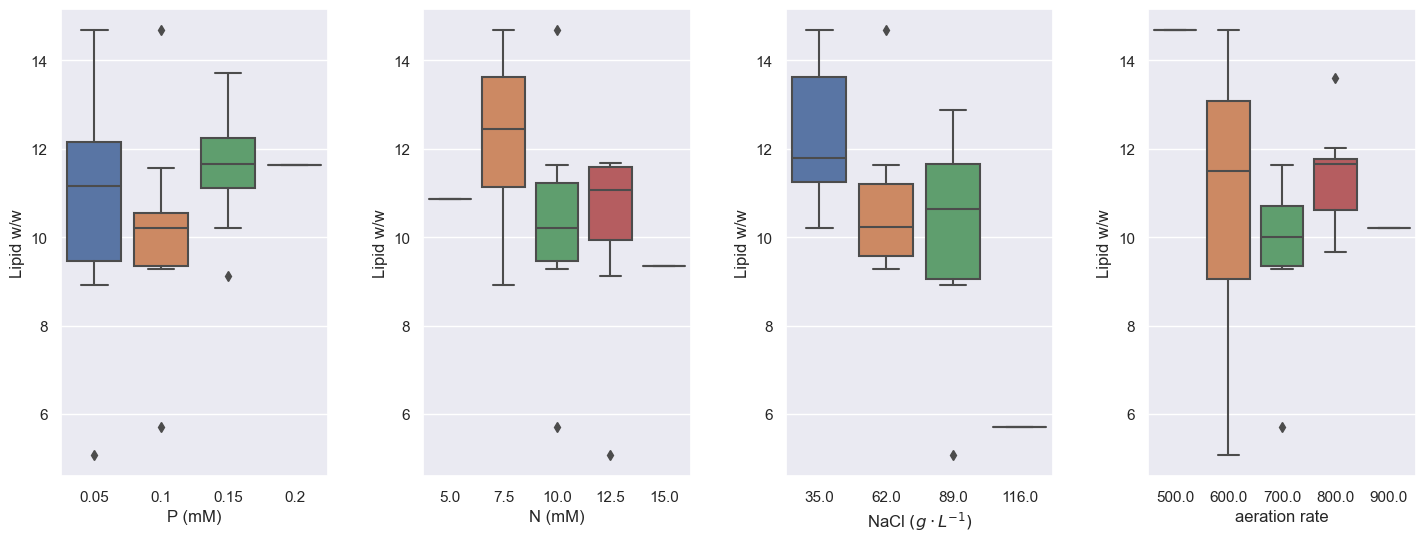

In [5]:
def stats(matrix):
    matrix.conditions = "Resume"
    matrix.conditions = matrix.conditions.rename({"[N] mmol": "N", "[P] mmol": "P", "Salinity g/L": "salinity", "Aeration rate": "aeration", 'growth_rate': 'umax', 'Productivity (g/L.h)': 'Pmax', 'Biomass (gDW/L)': 'biomass'}, axis=1)
    boxplot(matrix.conditions, x_cols=['P', 'N', 'salinity', 'aeration'], y_cols=['Pmax'], to_show=True, x_labels={'P': 'P (mM)', 'N': 'N (mM)', 'salinity': 'NaCl $(g \cdot L^{-1})$', 'aeration': 'aeration rate'}
                            , y_labels={'Pmax': 'Pmax $(g \cdot L^{-1} \cdot d^{-1})$'})
    boxplot(matrix.conditions, x_cols=['P', 'N', 'salinity', 'aeration'], y_cols=['biomass'], to_show=True, x_labels={'P': 'P (mM)', 'N': 'N (mM)', 'salinity': 'NaCl $(g \cdot L^{-1})$', 'aeration': 'aeration rate'}
            , y_labels={'biomass': 'Biomass $(g \cdot L^{-1} \cdot d^{-1})$'})
    boxplot(matrix.conditions, x_cols=['P', 'N', 'salinity', 'aeration'], y_cols=['umax'], to_show=True, x_labels={'P': 'P (mM)', 'N': 'N (mM)', 'salinity': 'NaCl $(g \cdot L^{-1})$', 'aeration': 'aeration rate'}
            , y_labels={'umax': 'umax $(g \cdot L^{-1} \cdot d^{-1})$'})
    stats = StatisticalAnalysis(matrix.conditions)
    anova_table, model = stats.anova('biomass ~ P')
    print(anova_table)
    # hist(matrix.conditions, ['biomass'], title='Biomass', xlabel='Biomass $(g \cdot L^{-1})$', ylabel='Frequency')
    # hist(matrix.conditions, ['Pmax'], title='Maximum Productivity', xlabel='Pmax $(g \cdot L^{-1} \cdot h^{-1})$', ylabel='Frequency')
    # hist(matrix.conditions, ['umax'], title='Growth Rate', xlabel='Biomass $(h^{-1})$', ylabel='Frequency')
    qqplot(model, to_show=True)
biomass = Biomass("e_Biomass__cytop", f"{DATA_PATH}/experimental/Biomass_exp_composition.xlsx")
matrix = ExpMatrix(f"{DATA_PATH}/experimental/Matriz- DCCR Dunaliella salina_new.xlsx")
matrix.conditions = "Resume"
matrix.conditions = matrix.conditions.rename({"[N] mmol": "N", "[P] mmol": "P", "Salinity g/L": "salinity", "Aeration rate": "aeration", 'growth_rate': 'umax', 'Productivity (g/L.h)': 'Pmax', 'Biomass (gDW/L)': 'biomass'}, axis=1)
stats(matrix)
m = pd.concat([biomass.biomass_matrix['macromolecules'], matrix.conditions[["N", "P", "salinity", "aeration"]]], axis=1)
m = m.dropna()
boxplot(m, x_cols=['P', 'N', 'salinity', 'aeration'], y_cols=['Protein'], to_show=True, x_labels={'P': 'P (mM)', 'N': 'N (mM)', 'salinity': 'NaCl $(g \cdot L^{-1})$', 'aeration': 'aeration rate'}
    , y_labels={'Protein': 'Protein w/w'})
boxplot(m, x_cols=['P', 'N', 'salinity', 'aeration'], y_cols=['Carbohydrate'], to_show=True, x_labels={'P': 'P (mM)', 'N': 'N (mM)', 'salinity': 'NaCl $(g \cdot L^{-1})$', 'aeration': 'aeration rate'}
    , y_labels={'Carbohydrate': 'Carbohydrate w/w'})
boxplot(m, x_cols=['P', 'N', 'salinity', 'aeration'], y_cols=['Lipid'], to_show=True, x_labels={'P': 'P (mM)', 'N': 'N (mM)', 'salinity': 'NaCl $(g \cdot L^{-1})$', 'aeration': 'aeration rate'}
    , y_labels={'Lipid': 'Lipid w/w'})

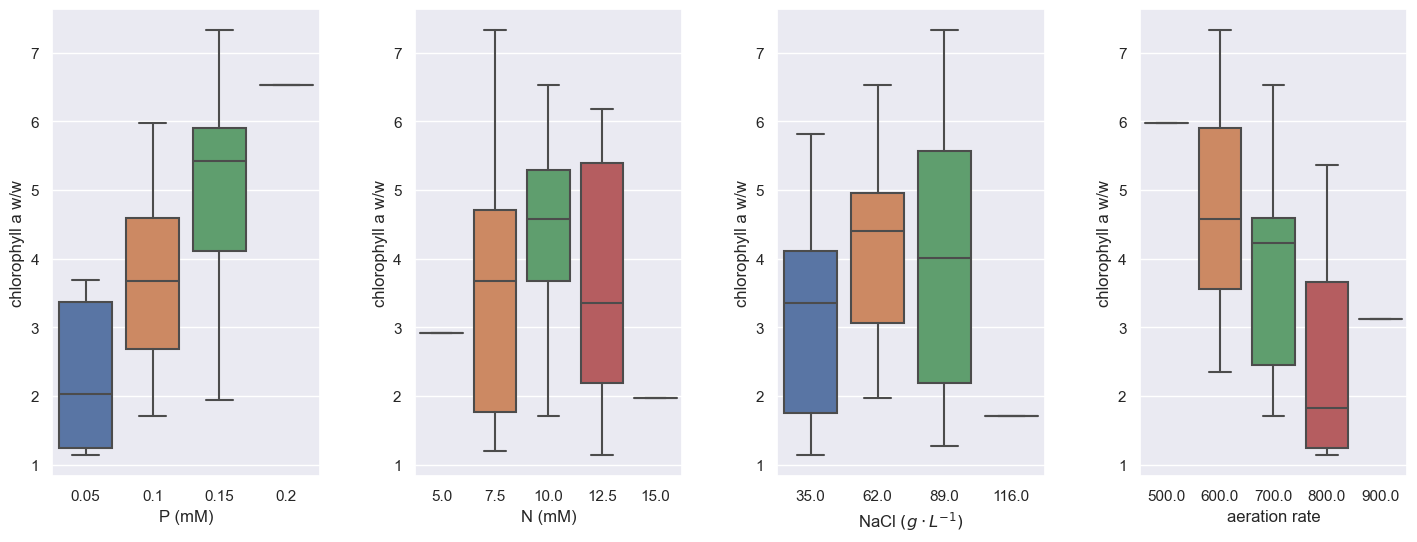

In [18]:
boxplot(m, x_cols=['P', 'N', 'salinity', 'aeration'], y_cols=['chla'], to_show=True, x_labels={'P': 'P (mM)', 'N': 'N (mM)', 'salinity': 'NaCl $(g \cdot L^{-1})$', 'aeration': 'aeration rate'}
        , y_labels={'chla': 'chlorophyll a w/w'})

In [24]:
stats = StatisticalAnalysis(m)
cor = stats.get_correlation()
print(cor)

          lutein  chlb  chla  carotene     N     P  salinity  aeration
lutein      1.00  0.93  0.89      0.76 -0.06  0.63      0.08     -0.39
chlb        0.93  1.00  0.95      0.79 -0.03  0.71      0.10     -0.41
chla        0.89  0.95  1.00      0.87 -0.05  0.68      0.06     -0.52
carotene    0.76  0.79  0.87      1.00 -0.21  0.55     -0.16     -0.61
N          -0.06 -0.03 -0.05     -0.21  1.00  0.00     -0.00     -0.00
P           0.63  0.71  0.68      0.55  0.00  1.00     -0.01      0.00
salinity    0.08  0.10  0.06     -0.16 -0.00 -0.01      1.00      0.00
aeration   -0.39 -0.41 -0.52     -0.61 -0.00  0.00      0.00      1.00


chlorophyll = 0.044P + 0.002
0.697481811861253


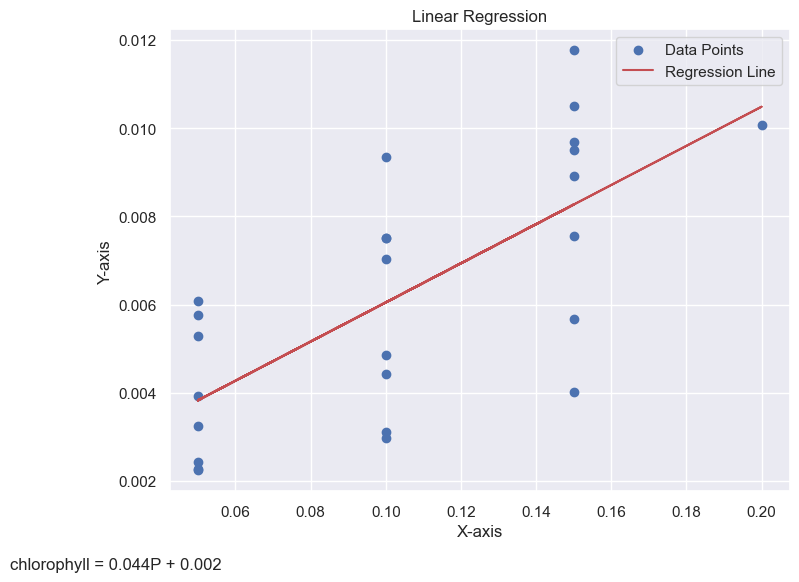

In [54]:
from matplotlib import pyplot as plt
import scipy

temp_results = m.copy()
temp_results['chlorophyll'] = temp_results['chla'] + temp_results['chlb']

temp_results['chlorophyll'] = temp_results['chlorophyll']/1000

slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(temp_results['P'], temp_results['chlorophyll'])

# Create the regression line equation
equation = f'chlorophyll = {slope:.3f}P + {intercept:.3f}'
plt.figure(figsize=(8, 6))
# Create a scatter plot of the data points
plt.scatter(temp_results['P'], temp_results['chlorophyll'], label='Data Points')
# Add the regression line to the plot
plt.plot(m['P'], slope * m['P'] + intercept, 'r', label='Regression Line')

# Add labels and title to the plot
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Linear Regression')
plt.legend()
print(equation)
print(r_value)
# Display the equation on the plot
plt.text(0, 0, equation, fontsize=12)

# Show the plot
plt.show()

chlorophyll = -0.00001aeration + 0.016
-0.48859867676983487


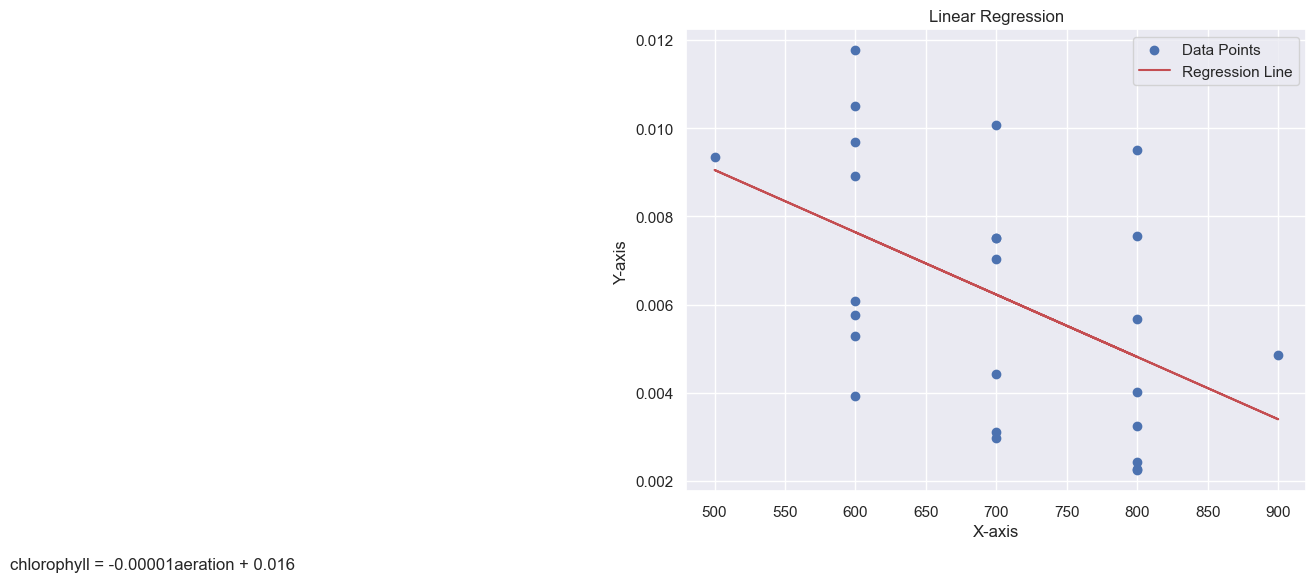

In [56]:
from matplotlib import pyplot as plt
import scipy

temp_results = m.copy()
temp_results['chlorophyll'] = temp_results['chla'] + temp_results['chlb']

temp_results['chlorophyll'] = temp_results['chlorophyll']/1000

slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(temp_results['aeration'], temp_results['chlorophyll'])

# Create the regression line equation
equation = f'chlorophyll = {slope:.5f}aeration + {intercept:.3f}'
plt.figure(figsize=(8, 6))
# Create a scatter plot of the data points
plt.scatter(temp_results['aeration'], temp_results['chlorophyll'], label='Data Points')
# Add the regression line to the plot
plt.plot(m['aeration'], slope * m['aeration'] + intercept, 'r', label='Regression Line')

# Add labels and title to the plot
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Linear Regression')
plt.legend()
print(equation)
print(r_value)
# Display the equation on the plot
plt.text(0, 0, equation, fontsize=12)

# Show the plot
plt.show()